In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import *
from implementations import *
from CrossValidation import *
from PreProcessing import *
from plots import choose_max_iter
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


IMPORTING TRAINING DATA

In [2]:
y,tx,ids,features = load_train_data('train.csv')

IDENTIFYING THE COLUMNS HAVING MISSING VALUES

In [4]:
tx=managing_missing_values(tx)
tx

array([[ 1.38470e+02,  5.16550e+01,  9.78270e+01, ...,  2.15000e+00,
         4.44000e-01,  1.13497e+02],
       [ 1.60937e+02,  6.87680e+01,  1.03235e+02, ...,  7.25000e-01,
         1.15800e+00,  4.62260e+01],
       [ 1.12406e+02,  1.62172e+02,  1.25953e+02, ...,  2.05300e+00,
        -2.02800e+00,  4.42510e+01],
       ...,
       [ 1.05457e+02,  6.05260e+01,  7.58390e+01, ...,  1.80000e+00,
        -1.66000e-01,  4.19920e+01],
       [ 9.49510e+01,  1.93620e+01,  6.88120e+01, ...,  0.00000e+00,
        -3.30000e-02,  0.00000e+00],
       [ 1.12406e+02,  7.27560e+01,  7.08310e+01, ...,  0.00000e+00,
        -3.30000e-02,  0.00000e+00]])

In [5]:
tx=capping_outliers(tx)

In [6]:
tx_train,mean,std = standardize(tx)

In [7]:
Cov_matr=1/tx_train.shape[0] * tx_train.T.dot(tx_train)

<AxesSubplot:>

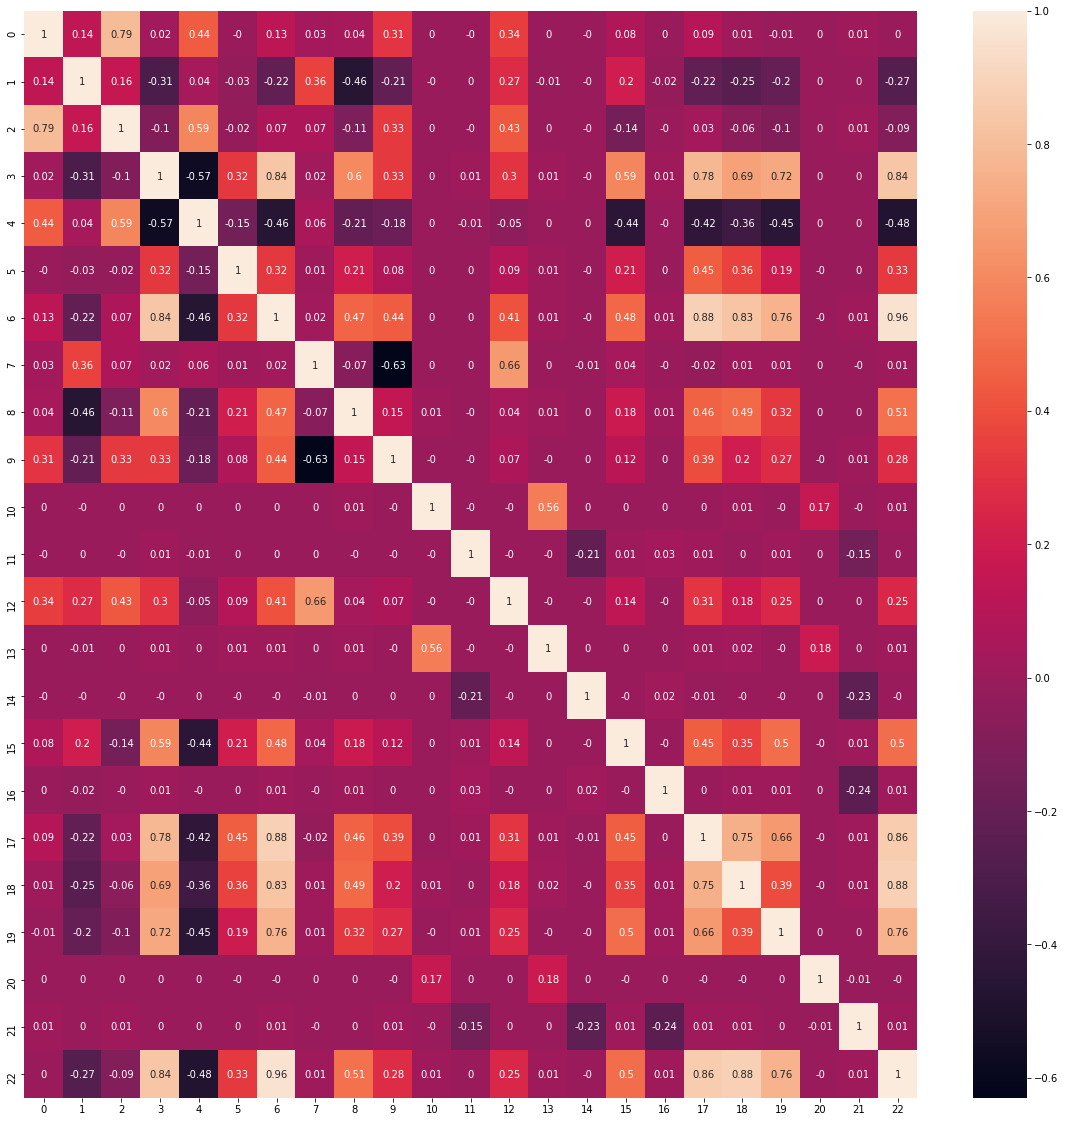

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(Cov_matr.round(2), annot=True) 

In [16]:
e_values, PCs, X = PCA(tx_train)
somma=np.sum(e_values)
v=0
a=[]
for i in range(len(e_values)):
    v+=e_values[i]/somma
    a.append(v)


In [35]:
PCs.shape

(23, 23)

Text(0, 0.5, 'Explained Variaces')

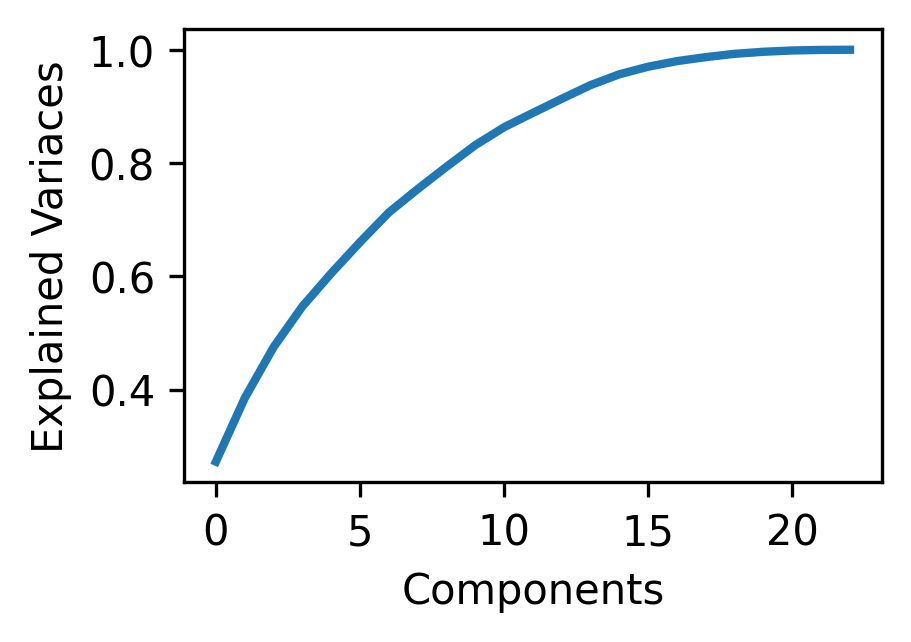

In [22]:
plt.figure(1, figsize=(3,2), dpi=300)
plt.plot(a, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')

In [36]:
# dal grafico sopra prendo le prime 20 componenti
PCs_new=PCs[:20,:20]
X_new=X[:,:20]

In [26]:
#reg log with PCA
w = np.zeros(X_new.shape[1])
final_w_PCA,loss = reg_logistic_regression(y, X_new,0.1,w, max_iters=500, gamma=0.3)

In [27]:
print(final_w_PCA)
print(loss)

[-0.4419265   0.04062358 -0.02443769  0.647126    0.25977779 -0.03119879
  0.06184264 -0.17430799  0.09920219  0.02154756 -0.03317842  0.07814022
 -0.1341247  -0.60966986 -0.19909702 -0.38874155 -0.14716577  0.0513855
  0.39194868  0.68926799]
0.5755818107855815


In [28]:
#reg los without PCA and with 23 features
w = np.zeros(tx_train.shape[1])
final_w1,loss1 = reg_logistic_regression(y, tx_train,0.1,w, max_iters=500, gamma=0.3)

In [33]:
print(final_w1.round(3))
print(loss1)

[ 0.327 -0.638 -0.726  0.198  0.626 -0.151 -0.031 -0.076  0.178  0.684
 -0.002 -0.003  0.296 -0.002  0.007  0.09   0.    -0.109 -0.009 -0.016
 -0.002 -0.001  0.059]
0.5737455423856189


In [37]:
tx_test,test_ids=load_test_data('test.csv')

KeyboardInterrupt: 

In [ ]:
tx_test1=managing_missing_values(tx_test)

In [27]:
tx_test1 = (tx_test1 - mean) / std

In [ ]:
#submit with PCA
tx_test_PCA = np.matmul(tx_test, PCs_new.T)
prediction = predict(tx_test_PCA,final_w_PCA,threshold = 0.55)
create_submission(test_ids,prediction, ['Id','Prediction'],'.\output\predictionPCA.csv')

In [28]:
#submit without PCA and with 23 features
prediction = predict(tx_test,final_w1,threshold = 0.55)
create_submission(test_ids,prediction, ['Id','Prediction'],'.\output\prediction(coll_noPCA).csv')

array([-1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1])

In [ ]:
#submit without collinearity
useless=[17,18,19,22]
tx_train_nocoll=tx_train[:,~useless]
w = np.zeros(tx_train.shape[1])
final_w,loss = reg_logistic_regression(y, tx_train_nocoll,0.1,w, max_iters=500, gamma=0.3)
tx_test_nocoll=tx_test[:,~useless]
prediction = predict(tx_test_nocoll,final_w,threshold = 0.55)
create_submission(test_ids,prediction, ['Id','Prediction'],'.\output\prediction(no_coll).csv')